In [14]:
import os
import random
import glob
import numpy as np
import cv2
import tensorflow as tf

import matplotlib.pyplot as plt

In [15]:
def plot_image(images, captions=None, cmap=None):
    """
    Plot n images using subplots
    """
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

In [16]:
# Random seed
SEED = 30
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Dataset path
DATASET_PATH = "../data/hand_gesture_recog/data"

<class 'numpy.ndarray'>
(200, 200, 3)


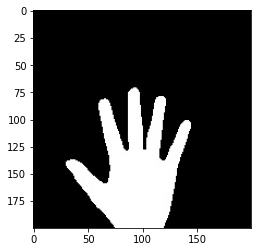

In [17]:
img = cv2.imread(os.path.join(DATASET_PATH, "five/hand1(21).jpg"))
print(type(img))
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

../data/hand_gesture_recog/data/five
['../data/hand_gesture_recog/data/five/hand1(95).jpg', '../data/hand_gesture_recog/data/five/wade461.jpg', '../data/hand_gesture_recog/data/five/wade348.jpg', '../data/hand_gesture_recog/data/five/hand1(939).jpg', '../data/hand_gesture_recog/data/five/wade898.jpg', '../data/hand_gesture_recog/data/five/wade769.jpg', '../data/hand_gesture_recog/data/five/wade97.jpg', '../data/hand_gesture_recog/data/five/wade364.jpg', '../data/hand_gesture_recog/data/five/hand1(673).jpg', '../data/hand_gesture_recog/data/five/wade32.jpg', '../data/hand_gesture_recog/data/five/hand1(615).jpg', '../data/hand_gesture_recog/data/five/hand1(484).jpg', '../data/hand_gesture_recog/data/five/hand1(192).jpg', '../data/hand_gesture_recog/data/five/wade225.jpg', '../data/hand_gesture_recog/data/five/hand1(88).jpg', '../data/hand_gesture_recog/data/five/wade45.jpg', '../data/hand_gesture_recog/data/five/hand1(225).jpg', '../data/hand_gesture_recog/data/five/hand1(943).jpg', '../

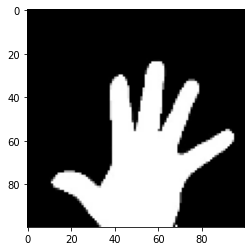

In [18]:
gesture_path = os.path.join(DATASET_PATH, "five")
print(gesture_path)

gestures = glob.glob(os.path.join(gesture_path, "*"))
print(gestures)

rand_index = random.randint(0, len(gestures))
img = cv2.imread(gestures[rand_index])
img = cv2.resize(img, (100, 100))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
gestures_paths = glob.glob(os.path.join(DATASET_PATH, "*"))
gestures_paths.sort()
print(gestures_paths)

['../data/hand_gesture_recog/data/blank', '../data/hand_gesture_recog/data/fist', '../data/hand_gesture_recog/data/five', '../data/hand_gesture_recog/data/ok', '../data/hand_gesture_recog/data/thumbsdown', '../data/hand_gesture_recog/data/thumbsup']


In [20]:
MAX_SAMPLE_PER_GESTURE = 1600

images = []
labels = []
label_to_class = {}

for i, gestures_path in enumerate(gestures_paths):
    gesture_type = gestures_path.split("/")[-1]
    gestures = glob.glob(os.path.join(gesture_path, "*"))
    label = [0] * len(gestures_paths)
    label[i] = 1
    label_to_class[i] = gesture_type
    for j, gesture in enumerate(gestures):
        if j == MAX_SAMPLE_PER_GESTURE:
            break
        img = cv2.imread(gesture)
        img = cv2.resize(img,(100, 100))            # Resize
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Gray scale
        images.append(img)
        labels.append(label)
    
print(len(images))
print(len(labels))
print(len(label_to_class))
print(label_to_class)

9600
9600
6
{0: 'blank', 1: 'fist', 2: 'five', 3: 'ok', 4: 'thumbsdown', 5: 'thumbsup'}


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

# Model
model = Sequential()

# First conv layer
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(100, 100, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layer
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

# Softmax layer
model.add(Dense(len(label_to_class), activation="softmax"))

# Model summary
optimiser = Adam()
model.compile(optimizer=optimiser, loss="categorical_crossentropy", metrics=["categorical_accuracy"])
model.summary()

In [ ]:
X = np.asarray(images)
y = np.asarray(labels)
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
model.fit(X_train,
          y_train,
          batch_size=64,
          epochs=64,
          verbose=1,
          validation_data=(X_test, y_test))

model.save("hand_gesture_recog_model.keras")

In [ ]:
from keras.models import load_model

model = load_model("hand_gesture_recog_model.keras")
model.summary()

In [ ]:
gesture_path = os.path.join(DATASET_PATH, "thumbsdown")
print(gesture_path)

gestures = glob.glob(os.path.join(gesture_path, "*"))
print(gestures)

rand_index = random.randint(0, len(gestures))
img = cv2.imread(gestures[rand_index])
img = cv2.resize(img,(100, 120))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
print(img.shape)
img =  img.reshape(-1, 100, 120, 1)
print(img.shape)

In [ ]:
pred = np.argmax(model.predict(img), axis=1)
print(f"{pred[0]}: {label_to_class[pred[0]]}")